                                        Hacker News dataset Analysis

The dataset has been obtained from https://www.kaggle.com/hacker-news/hacker-news-posts

The aim of this notebook is to find the answer to the following question:

*What time of the day is the best time to upload a post so as to have the best chance of getting upvoted*

In [1]:
import re

import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv("../data/HN_posts_year_to_Sep_26_2016.csv")

Let's just have a quick preview of the data before we begin!

In [8]:
data

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14
5,12578975,Saving the Hassle of Shopping,https://blog.menswr.com/2016/09/07/whats-new-w...,1,1,bdoux,9/26/2016 3:13
6,12578954,Macalifa A new open-source music app for UWP ...,http://forums.windowscentral.com/windows-phone...,1,0,thecodrr,9/26/2016 3:06
7,12578942,GitHub theweavrs/Macalifa: A music player wri...,https://github.com/theweavrs/Macalifa,1,0,thecodrr,9/26/2016 3:04
8,12578919,Google Allo first Impression,http://prodissues.com/2016/09/google-allo-firs...,3,0,jandll,9/26/2016 2:57
9,12578918,Advanced Multimedia on the Linux Command Line,https://avi.alkalay.net/2016/09/multimedia-lin...,1,0,mynameislegion,9/26/2016 2:56


So from the above preview of the data, we can see that the created_at is of the format "month/day/year hour:minutes". We can process this to convert it into a datetime object so that extracting the important information becomes easier. 
We shall do this by the process as described below. Note that we will concentrate on the hour of the day and not necessarily minutes for simplicity.

In [9]:
data['created_at']=data['created_at'].map(lambda x:datetime.strptime(x,'%m/%d/%Y %H:%M'))
data['hour']=data['created_at'].map(lambda x:x.hour)
data['year']=data['created_at'].map(lambda x:x.year)
data['month']=data['created_at'].map(lambda x:x.month)
data['title']=data['title'].map(lambda x:x.lower())

In [10]:
data

,id,title,url,num_points,num_comments,author,created_at,hour,year,month
0,12579008,you have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,2016-09-26 03:26:00,3,2016,9
1,12579005,sqlar the sqlite archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,2016-09-26 03:24:00,3,2016,9
2,12578997,what if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,2016-09-26 03:19:00,3,2016,9
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,2016-09-26 03:16:00,3,2016,9
4,12578979,how the data vault enables the next-gen data w...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,2016-09-26 03:14:00,3,2016,9
5,12578975,saving the hassle of shopping,https://blog.menswr.com/2016/09/07/whats-new-w...,1,1,bdoux,2016-09-26 03:13:00,3,2016,9
6,12578954,macalifa a new open-source music app for uwp ...,http://forums.windowscentral.com/windows-phone...,1,0,thecodrr,2016-09-26 03:06:00,3,2016,9
7,12578942,github theweavrs/macalifa: a music player wri...,https://github.com/theweavrs/Macalifa,1,0,thecodrr,2016-09-26 03:04:00,3,2016,9
8,12578919,google allo first impression,http://prodissues.com/2016/09/google-allo-firs...,3,0,jandll,2016-09-26 02:57:00,2,2016,9
9,12578918,advanced multimedia on the linux command line,https://avi.alkalay.net/2016/09/multimedia-lin...,1,0,mynameislegion,2016-09-26 02:56:00,2,2016,9


Now that we have hour, month and year sorted out, let's continue with the analysis. For starters, let's see the distribution of the posts according to the hour of the day across the different months

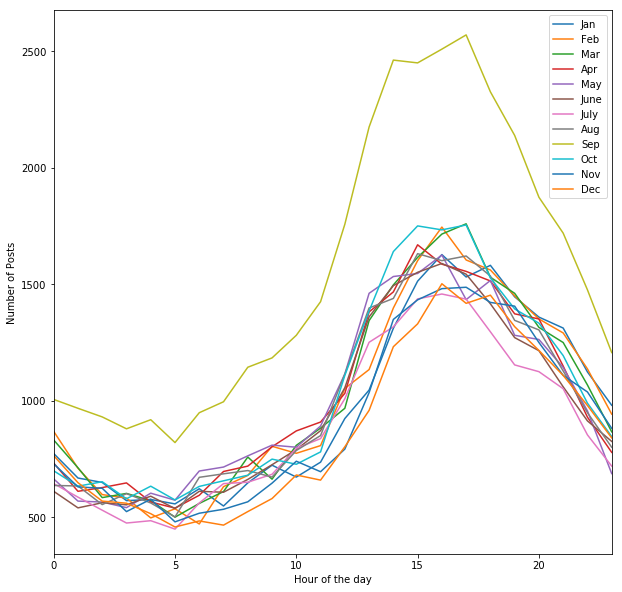

In [11]:
# Hourly distribution of posts based on months
plt.figure()
monthLabel=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
for monthVal in range(1,13):
    data[data['month']==monthVal].groupby(['hour'])['id'].count().plot(figsize=(10,10),label=monthLabel[monthVal-1])
plt.xlabel("Hour of the day")
plt.ylabel("Number of Posts")
plt.legend()
plt.show()

So it looks like the the hours 14 to 18 are the most popular for putting up posts on Hacker News. Let's try to zoom in on that time difference

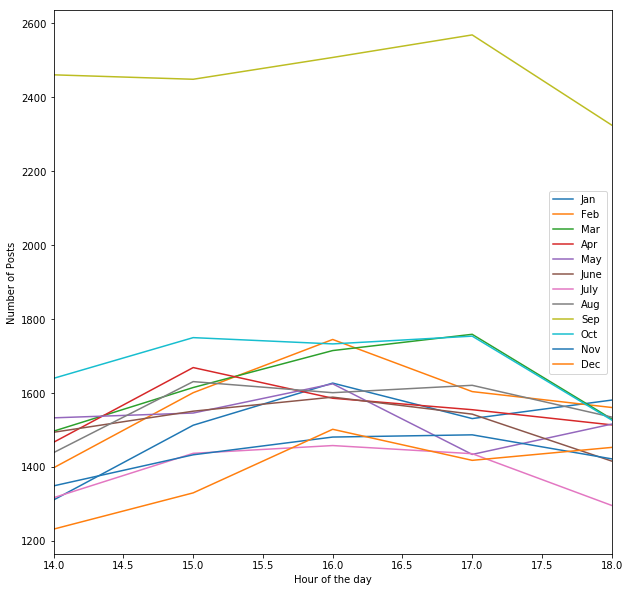

In [26]:
# Hourly distribution of posts based on months for the hours 14 to 18
plt.figure()
monthLabel=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
for monthVal in range(1,13):
    month_data = data[data['month']==monthVal]
    hour_data = month_data[(month_data['hour'] >= 14) & (month_data['hour'] <= 18)]
    hour_data.groupby(['hour'])['id'].count().plot(figsize=(10,10),label=monthLabel[monthVal-1])
plt.xlabel("Hour of the day")
plt.ylabel("Number of Posts")
plt.legend()
plt.show()

This is interesting, it looks like 4 PM is the most popular time to upload a post! Let's plot a bargraph to get a better idea.

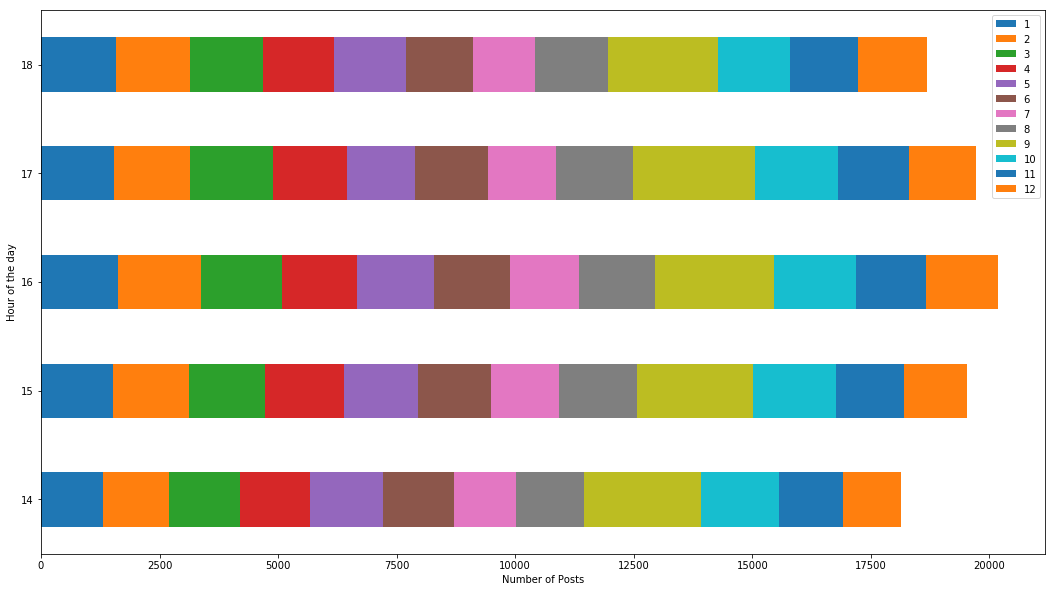

In [55]:
# Hourly distribution of posts (horizontal bar graph) based on months for the hours 14 to 18
# monthLabel = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
hour_data = data[(data['hour'] >= 14) & (data['hour'] <= 18)]
hour_data.groupby(['hour', 'month'])['id'].count().unstack().plot(kind='barh', figsize=(18,10), stacked=True)
plt.xlabel("Number of Posts")
plt.ylabel("Hour of the day")
plt.legend()
plt.show()

From the above plot, it looks like it's safe to assume that 4 PM is the most popular time to upload a post on Hacker News. 
Now that we have a general idea about when is the most popular time to put up a post, let's see if the comments on post also follow the same pattern.

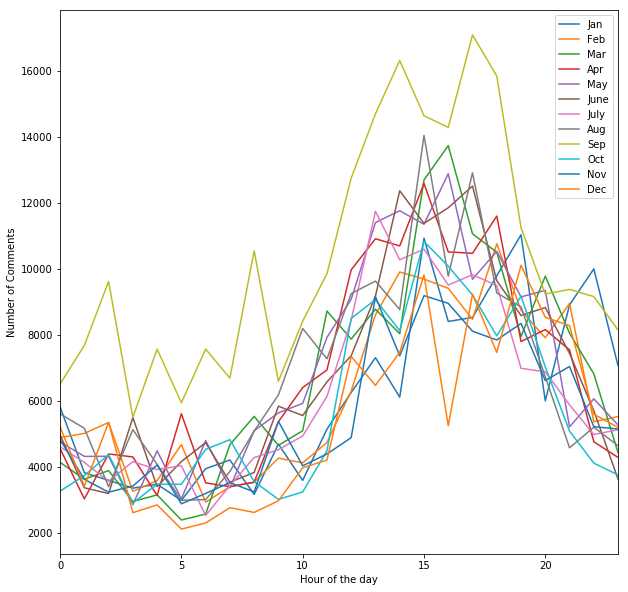

In [11]:
# Hourly distribution of comments
plt.figure()
for monthVal in range(1,13):
    data[data['month']==monthVal].groupby(['hour'])['num_comments'].sum().plot(figsize=(10,10),label=monthLabel[monthVal-1])
plt.xlabel("Hour of the day")
plt.ylabel("Number of Comments")
plt.legend()
plt.show()

As expected, the comments also follow the same pattern as does the most popular time to put up a post. Let's zoom in again on the interval 10 - 20 to have a better look

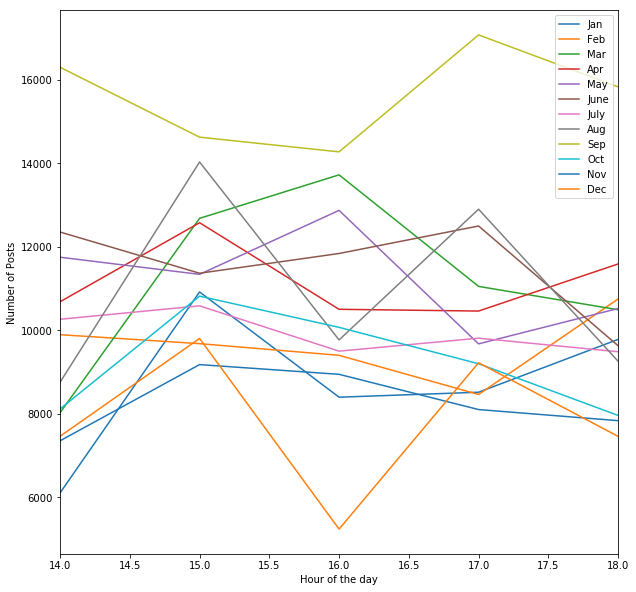

In [27]:
# Hourly distribution of posts based on months for the hours 14 to 18
plt.figure()
monthLabel=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
for monthVal in range(1,13):
    month_data = data[data['month']==monthVal]
    hour_data = month_data[(month_data['hour'] >= 14) & (month_data['hour'] <= 18)]
    hour_data.groupby(['hour'])['num_comments'].sum().plot(figsize=(10,10),label=monthLabel[monthVal-1])
plt.xlabel("Hour of the day")
plt.ylabel("Number of Posts")
plt.legend()
plt.show()

This plot does not really give out much information. It's way too random. Let's try a horizontal bar graph and see if that helps!

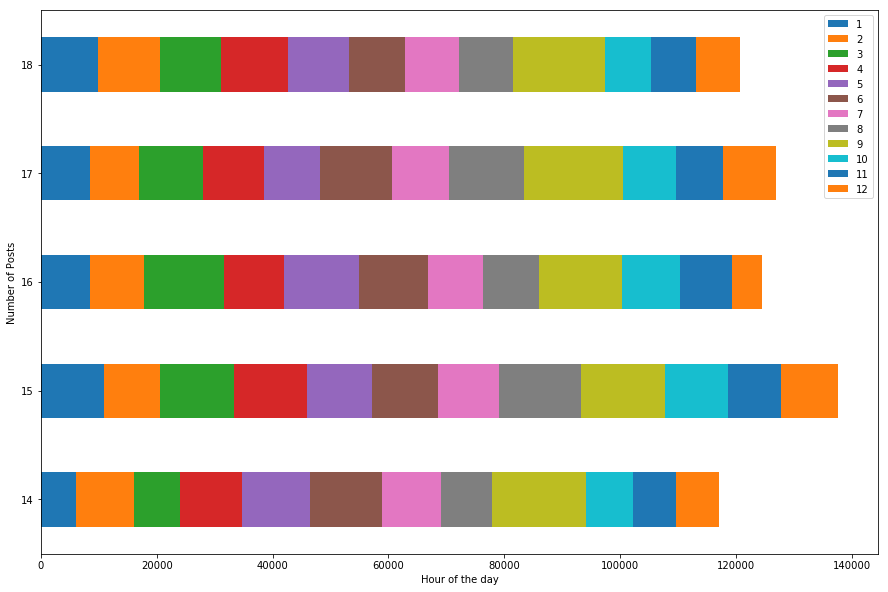

In [61]:
# Hourly distribution of posts (horizontal bar graph) based on months for the hours 14 to 18
hour_data = data[(data['hour'] >= 14) & (data['hour'] <= 18)]
hour_data.groupby(['hour', 'month'])['num_comments'].sum().unstack().plot(kind='barh', figsize=(15,10), stacked=True)
plt.xlabel("Hour of the day")
plt.ylabel("Number of Posts")
plt.legend()
plt.show()

This is interesting. The most popular time for uploading a post was 4 PM. However, contrary to what my hypothesis was (comments should be coming in after 4 PM) is wrong as it looks like the most popular time for commenting is 3 PM. 

Well then, let's move on to upvotes!

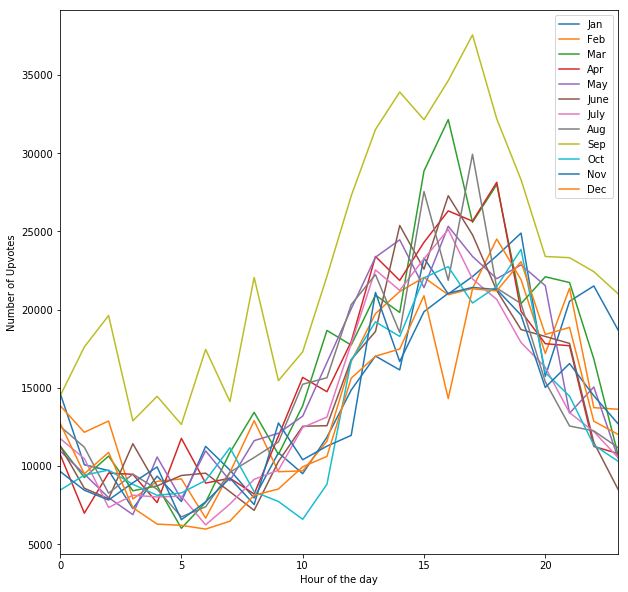

In [63]:
# Hourly distribution of upvotes
plt.figure()
monthLabel=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
for monthVal in range(1,13):
    data[data['month']==monthVal].groupby(['hour'])['num_points'].sum().plot(figsize=(10,10),label=monthLabel[monthVal-1])
plt.xlabel("Hour of the day")
plt.ylabel("Number of Upvotes")
plt.legend()
plt.show()

This is no surprise. The number of upvotes are also maximum in the range of 13 to 18 hour! Let's zoom in and analyze that!

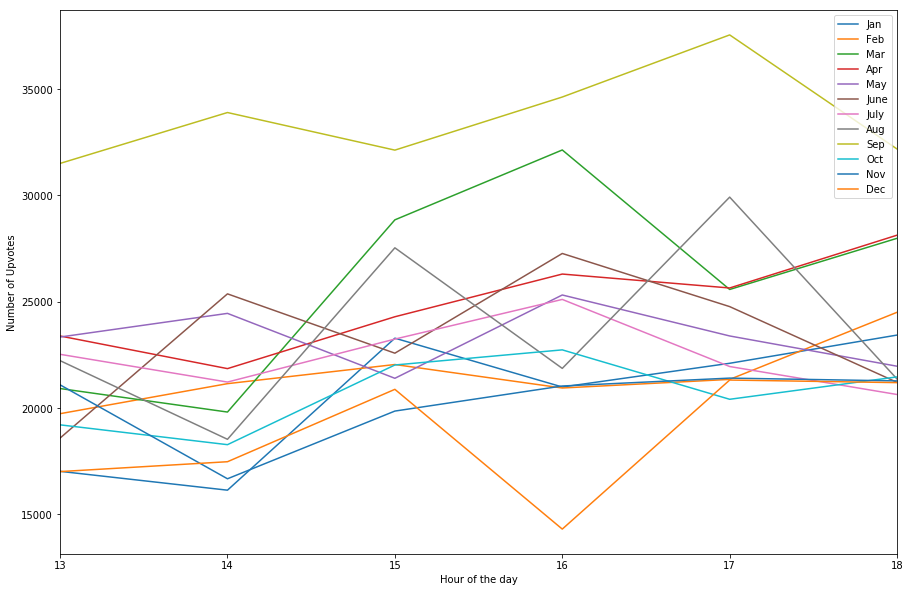

In [67]:
# Hourly distribution of upvotes for the hours 12 to 17
plt.figure()
monthLabel=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
for monthVal in range(1,13):
    month_data = data[data['month']==monthVal]
    hour_data = month_data[(month_data['hour'] >= 13) & (month_data['hour'] <= 18)]
    hour_data.groupby(['hour'])['num_points'].sum().plot(figsize=(15,10),label=monthLabel[monthVal-1])
plt.xlabel("Hour of the day")
plt.ylabel("Number of Upvotes")
plt.legend()
plt.show()

Hmm.. Not of much help. Let's try a bar graph next.

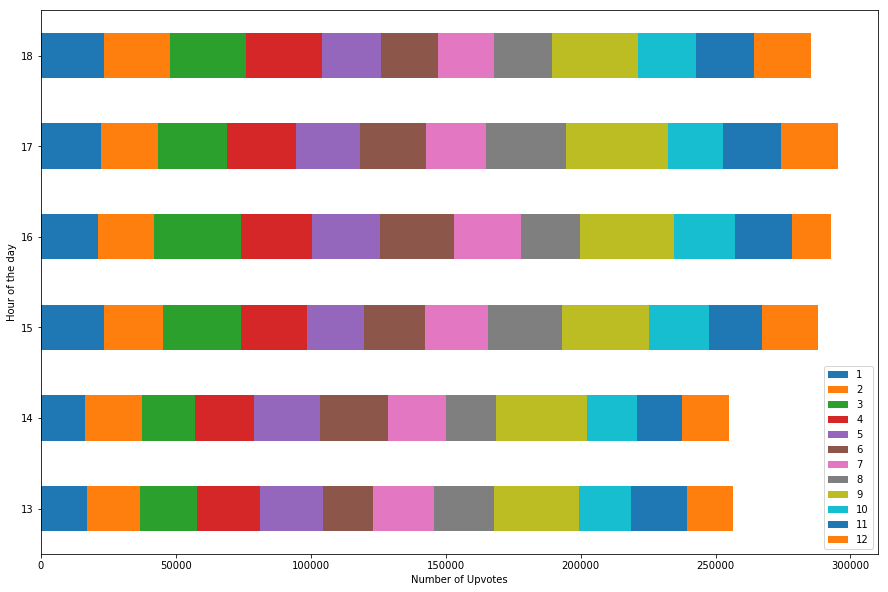

In [72]:
# Hourly distribution of upvotes (horizontal bar graph) for the hours 12 to 17
hour_data = data[(data['hour'] >= 13) & (data['hour'] <= 18)]
hour_data.groupby(['hour', 'month'])['num_points'].sum().unstack().plot(kind='barh', figsize=(15,10), stacked=True)
plt.xlabel("Number of Upvotes")
plt.ylabel("Hour of the day")
plt.legend()
plt.show()

This is much better! And as we can see, leading the pack are the hours 3PM, 4PM and 5PM with the maximum upvotes at around 5PM. This is in line with the hypothesis that the maximum votes happen after new posts are posted around 4PM.

In [16]:
# explore relationship between domain name and upvotes
data['domain'] = data['url'].str.extract('^http[s]*://([0-9a-z\-\.]*)/.*$',flags=re.IGNORECASE,expand=False)
data_groupby = data.groupby(by='domain')
data_groupby['num_points'].count().sort_values(ascending=False)[0:20]

domain
medium.com                 15929
github.com                 14416
www.nytimes.com             5985
www.youtube.com             5232
techcrunch.com              4114
www.theguardian.com         3429
arstechnica.com             2979
www.bloomberg.com           2742
en.wikipedia.org            2321
www.bbc.com                 1992
www.wsj.com                 1979
www.washingtonpost.com      1939
www.wired.com               1827
www.theverge.com            1811
www.theatlantic.com         1515
www.bbc.co.uk               1335
qz.com                      1200
www.businessinsider.com     1191
nautil.us                   1189
motherboard.vice.com        1133
Name: num_points, dtype: int64

In [29]:
df_from_series = pd.DataFrame([data_groupby['num_points'].count().sort_values(ascending=False)[:20]])

In [30]:
df_from_series

domain,medium.com,github.com,www.nytimes.com,www.youtube.com,techcrunch.com,www.theguardian.com,arstechnica.com,www.bloomberg.com,en.wikipedia.org,www.bbc.com,www.wsj.com,www.washingtonpost.com,www.wired.com,www.theverge.com,www.theatlantic.com,www.bbc.co.uk,qz.com,www.businessinsider.com,nautil.us,motherboard.vice.com
num_points,15929,14416,5985,5232,4114,3429,2979,2742,2321,1992,1979,1939,1827,1811,1515,1335,1200,1191,1189,1133


In [32]:
df_from_series.T

,num_points
domain,
medium.com,15929
github.com,14416
www.nytimes.com,5985
www.youtube.com,5232
techcrunch.com,4114
www.theguardian.com,3429
arstechnica.com,2979
www.bloomberg.com,2742
en.wikipedia.org,2321


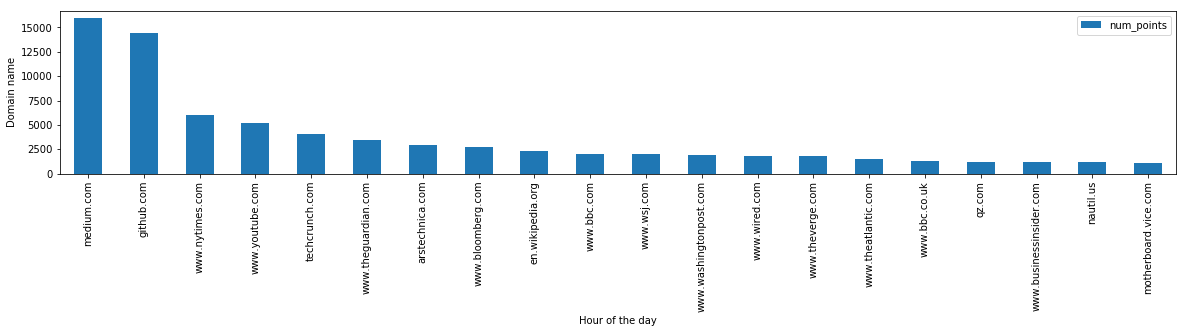

In [33]:
plt.figure()
df_from_series.T.plot(figsize=(20,3), kind='bar')
plt.xlabel("Hour of the day")
plt.ylabel("Domain name")
plt.show()

In [34]:
#best time to post
data['hour'] = data['created_at'].dt.hour
data_groupby = data.groupby(by='hour')
data_groupby['num_points'].mean().sort_values(ascending=False)

hour
12    16.785927
2     16.406170
11    16.192910
13    16.109430
0     15.879906
1     15.555303
4     15.403210
5     15.375918
19    15.362623
18    15.279771
10    15.034617
3     15.010244
17    14.987266
8     14.941080
15    14.757951
6     14.750407
7     14.740000
21    14.580325
16    14.509668
23    14.504527
9     14.499006
22    14.127970
14    14.051935
20    13.607835
Name: num_points, dtype: float64